In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper.trajectory import Trajectory
from helper.functions import visualize_dual_3d_scatter, store_truth_data

In [2]:
with open("../../dataset/dataframe-readins/test/5_sigma_dict.pkl", "rb") as f:
    test_traj_data = pickle.load(f)

In [3]:
traj_nos = [1, 10, 100]

In [4]:
def plot_column_vs_timestamp_fit(df, column_name, degree_test=5):
    values = np.array(df[column_name])
    timestamps = np.array(df["timestamp"])
    

    plt.figure(figsize=(8, 5))
    plt.plot(timestamps, values, linewidth=3, linestyle="-", color="g", label=f"True Data")
    
    for degree in range(3, degree_test+1):
        coeffs = np.polyfit(timestamps, values, degree)
        poly_func = np.poly1d(coeffs)
    
        t_smooth = np.linspace(min(timestamps), max(timestamps), 100)
        x_smooth = poly_func(t_smooth)
        plt.plot(t_smooth, x_smooth, '--', label=f"Polyfit Attempt: n=(degree {degree})")
        
    plt.xlabel("Timestamp [s]")
    plt.ylabel("Position [m]")
    plt.title(f"{column_name} position as a function of time")
    plt.grid(True)
    plt.legend()
    plt.show()

In [5]:
def return_polyfit_estimates(df, n_degree=6):
    timestamps = np.array(df["timestamp"])
    t_smooth = np.linspace(min(timestamps), max(timestamps), 100)
    x_values = np.array(df['tx'])
    y_values = np.array(df['ty'])
    z_values = np.array(df['tz'])
    
    poly_func_x = np.poly1d(np.polyfit(timestamps, x_values, n_degree))
    poly_func_y = np.poly1d(np.polyfit(timestamps, y_values, n_degree))
    poly_func_z = np.poly1d(np.polyfit(timestamps, z_values, n_degree))
    
    x_smooth = poly_func_x(t_smooth)
    y_smooth = poly_func_y(t_smooth)
    z_smooth = poly_func_z(t_smooth)
    
    return x_smooth, y_smooth, z_smooth, t_smooth

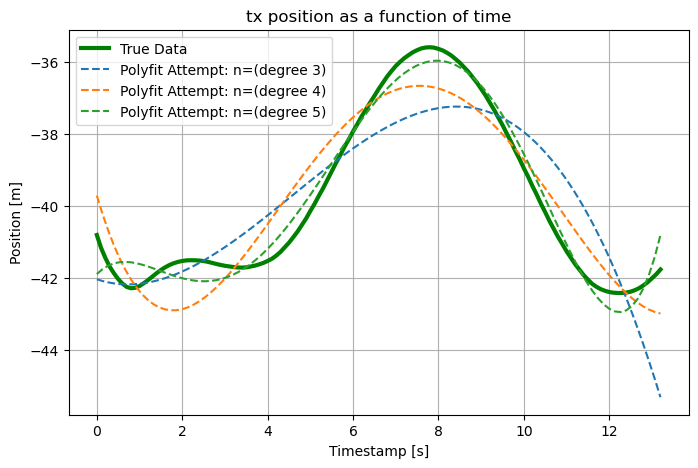

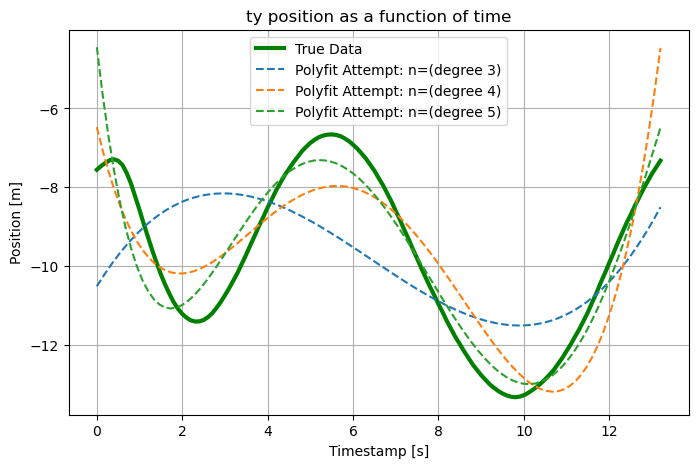

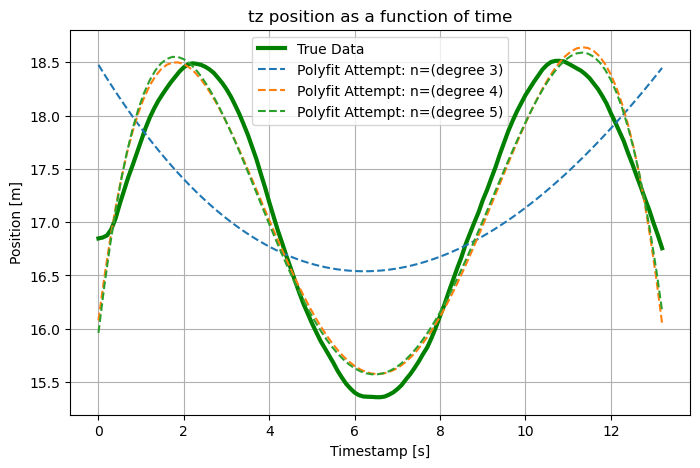

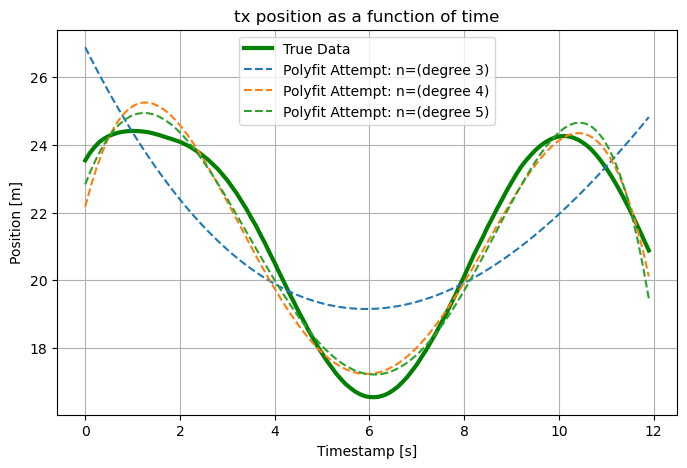

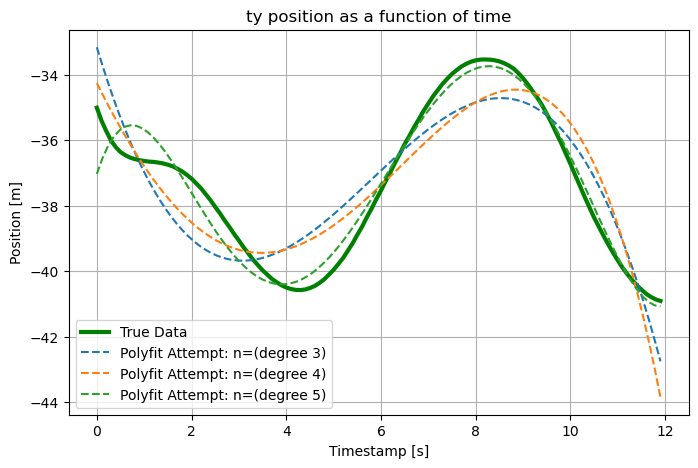

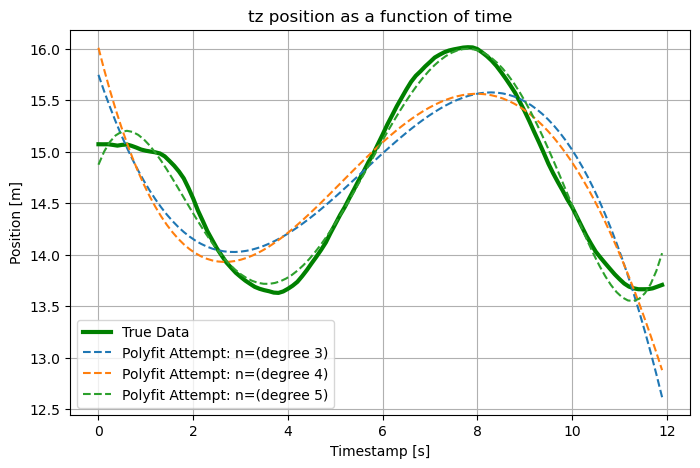

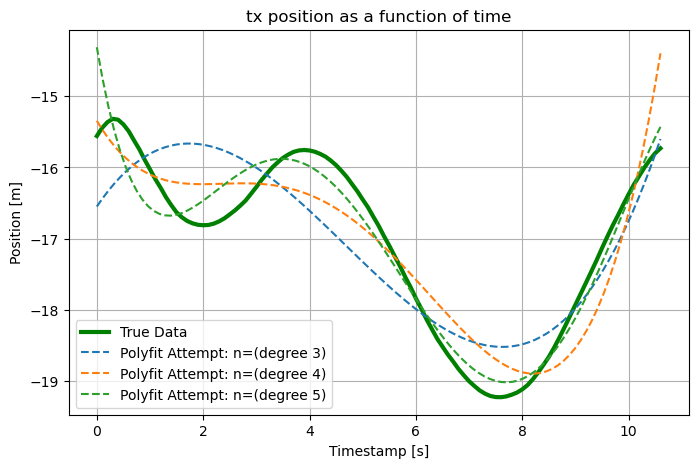

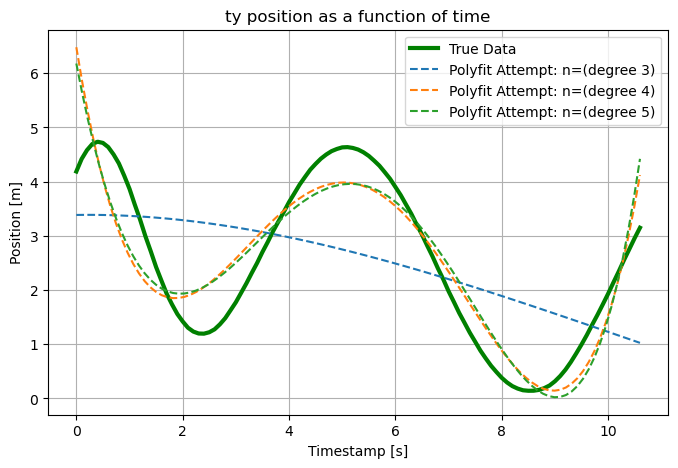

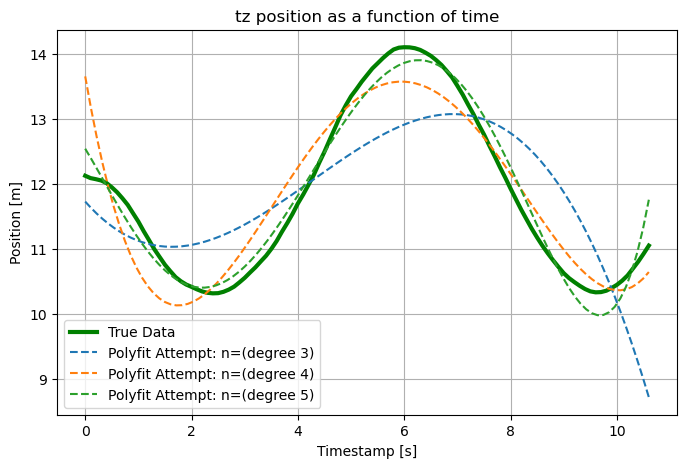

In [6]:
for no in traj_nos:
    plot_column_vs_timestamp_fit(test_traj_data[no], 'tx')
    plot_column_vs_timestamp_fit(test_traj_data[no], 'ty')
    plot_column_vs_timestamp_fit(test_traj_data[no], 'tz')

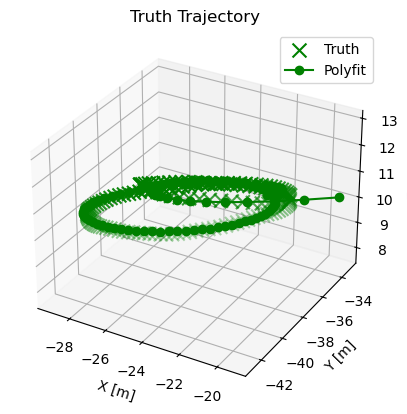

In [7]:
samp_no = 50
x_fit, y_fit, z_fit, t_fit = return_polyfit_estimates(test_traj_data[samp_no], n_degree=6)
test_traj = Trajectory(store_truth_data(test_traj_data[samp_no]), samp_no)

visualize_dual_3d_scatter(test_traj.truth_x, test_traj.truth_y, test_traj.truth_z, "Truth",  x_fit, y_fit, z_fit, "Polyfit")